In [2]:
library(tidyverse)
library(ggvenn)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid



In [3]:
### Venn diagram list -----
Total <- read.csv("Total/Total_Maya1_leaf.csv")
colnames(Total)
WT_UP <- Total %>%
  dplyr::filter(Log2FC_WT > 1, Padj_WT < 0.1)
fls2_UP <- Total %>%
  dplyr::filter(Log2FC_fls2 > 1, Padj_fls2 < 0.1)
WT_UP_only <- WT_UP %>%
  dplyr::filter(!(Gene %in% fls2_UP$Gene))

WT_DOWN <- Total %>%
  dplyr::filter(Log2FC_WT < -1, Padj_WT < 0.1)
fls2_DOWN <- Total %>%
  dplyr::filter(Log2FC_fls2 < -1, Padj_fls2 < 0.1)
WT_DOWN_only <- WT_DOWN %>%
  dplyr::filter(!(Gene %in% fls2_DOWN$Gene))

FLG22 <- read.csv("Total/Total_flg22_leaf(DESeq_DMSO_flg22_only_selected).csv", sep=",")
FLG22_UP <- FLG22 %>%
  dplyr::filter(Log2FC_flg22 > 1, Padj_flg22 < 0.1)

FLG22_DOWN <- FLG22 %>%
  dplyr::filter(Log2FC_flg22 < -1, Padj_flg22 < 0.1)

Total$Log2FC_flg22 <- FLG22$Log2FC_flg22
Total$Padj_flg22 <- FLG22$Padj_flg22

Total <- Total %>%
  dplyr::select(Gene, Gene_Symbol, Gene_Name, 
                Log2FC_WT, Padj_WT, Log2FC_fls2, Padj_fls2, Log2FC_flg22, Padj_flg22, GO)


### Drawing the Venn diagram -----
vennlistUp <- list( "WT_UP_only" = WT_UP_only$Gene,
                    "WT_DOWN_only" = WT_DOWN_only$Gene,
                    "FLG22_UP" = FLG22_UP$Gene,
                    "FLG22_DOWN" = FLG22_DOWN$Gene
)

[1] "X"               "Gene"            "Gene_Symbol"     "Gene_Name"      
 [5] "Log2FC_WT"       "Padj_WT"         "Log2FC_fls2"     "Padj_fls2"      
 [9] "DMSO_WT_rep1"    "DMSO_WT_rep2"    "DMSO_WT_rep3"    "Maya1_WT_rep1"  
[13] "Maya1_WT_rep2"   "Maya1_WT_rep3"   "DMSO_fls2_rep1"  "DMSO_fls2_rep2" 
[17] "DMSO_fls2_rep3"  "Maya1_fls2_rep1" "Maya1_fls2_rep2" "Maya1_fls2_rep3"
[21] "GO"

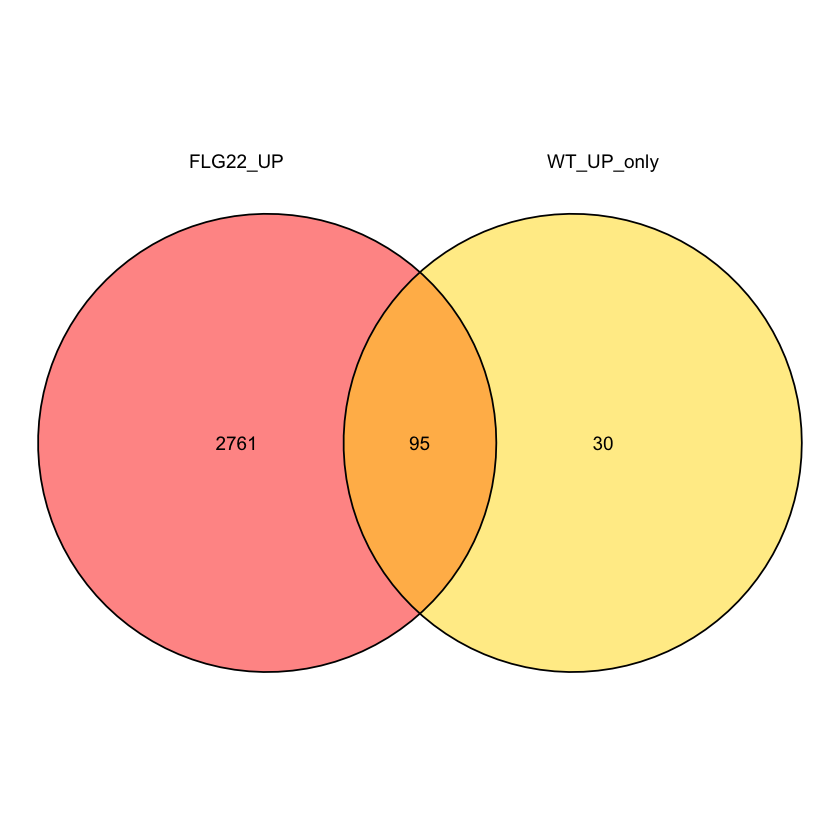

In [4]:
vennlistUp <- lapply(vennlistUp, function(x) x[!is.na(x)])

ggvenn(vennlistUp, c("FLG22_UP", "WT_UP_only"),
       fill_color = c("#ff2800", "#ffda00", "#ffae42"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

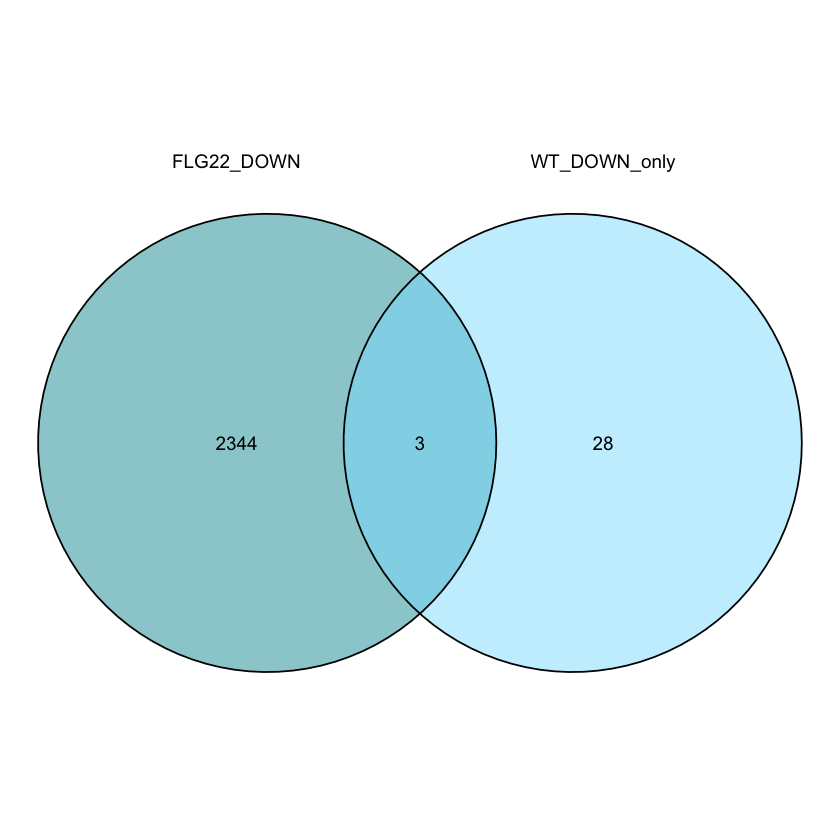

In [5]:
ggvenn(vennlistUp, c("FLG22_DOWN", "WT_DOWN_only"),
       fill_color = c("#0d9ba3", "#8ae0fe", "#4eabae"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

In [6]:
### Vene diagram related gene list -----
# UP gene list up
Both_UP_list <- intersect(vennlistUp$FLG22_UP, vennlistUp$WT_UP_only)
Maya1_UP_only_list <- setdiff(vennlistUp$WT_UP_only, vennlistUp$FLG22_UP)
FLG22_UP_only_list <- setdiff(vennlistUp$FLG22_UP, vennlistUp$WT_UP_only)
# DOWN gene list up
Both_DOWN_list <- intersect(vennlistUp$WT_DOWN_only, vennlistUp$FLG22_DOWN)
Maya1_DOWN_only_list <- setdiff(vennlistUp$WT_DOWN_only, vennlistUp$FLG22_DOWN)
FLG22_DOWN_only_list <- setdiff(vennlistUp$FLG22_DOWN, vennlistUp$WT_DOWN_only)

#filter by list
Both_UP <- Total %>%
  dplyr::filter(Gene %in% Both_UP_list)
nrow(Both_UP)
Maya1_UP_only <- Total %>%
  dplyr::filter(Gene %in% Maya1_UP_only_list)
nrow(Maya1_UP_only)
FLG22_UP_only <- Total %>%
  dplyr::filter(Gene %in% FLG22_UP_only_list)
nrow(FLG22_UP_only)

Both_DOWN <- Total %>%
  dplyr::filter(Gene %in% Both_DOWN_list)
nrow(Both_DOWN)
Maya1_DOWN_only <- Total %>%
  dplyr::filter(Gene %in% Maya1_DOWN_only_list)
nrow(Maya1_DOWN_only)
FLG22_DOWN_only <- Total %>%
  dplyr::filter(Gene %in% FLG22_DOWN_only_list)
nrow(FLG22_DOWN_only)

write.csv(Both_UP,"Venn/02.only_DMSO_flg22/Both_UP.csv")
write.csv(Maya1_UP_only,"Venn/02.only_DMSO_flg22/Maya1_UP_only.csv")
write.csv(FLG22_UP_only,"Venn/02.only_DMSO_flg22/FLG22_UP_only.csv")
write.csv(Both_DOWN,"Venn/02.only_DMSO_flg22/Both_DOWN.csv")
write.csv(Maya1_DOWN_only,"Venn/02.only_DMSO_flg22/Maya1_DOWN_only.csv")
write.csv(FLG22_DOWN_only,"Venn/02.only_DMSO_flg22/FLG22_DOWN_only .csv")

[1] 95

[1] 30

[1] 2761

[1] 3

[1] 28

[1] 2344